In [1]:
import pandas as pd
import numpy as np
import sys
reload(sys)
sys.setdefaultencoding('utf-8')
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
pd.options.display.max_columns = 500 # this will set limit of columns to 500
import re

In [183]:
df = pd.read_csv('../data/trainc.csv',encoding='utf8')

In [3]:
df.head(3)

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,2.0,80.0,80.0,23533.0,NaN,NaN,2015-08-23 00:00:00,0.0,0.0,0.0,0.0,0.0,2273000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,2.0,268.0,180.0,24514.0,19.3102045,-99.2276548,2013-06-28 00:00:00,0.0,0.0,0.0,1.0,1.0,3600000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,2.0,144.0,166.0,48551.0,NaN,NaN,2015-10-17 00:00:00,0.0,0.0,0.0,0.0,0.0,1200000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df2 = df[['id','descripcion']]

In [5]:
df2 = df2.dropna()

# Realizamos Word Cloud para ver frecuencia de los terminos 

In [6]:
comment_words = '' 
stopwords = set(STOPWORDS)

In [7]:
words = []

for index,row in df2.iterrows():
    # typecaste each val to string 
    val = row.descripcion
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

In [8]:
len(comment_words)

98504582

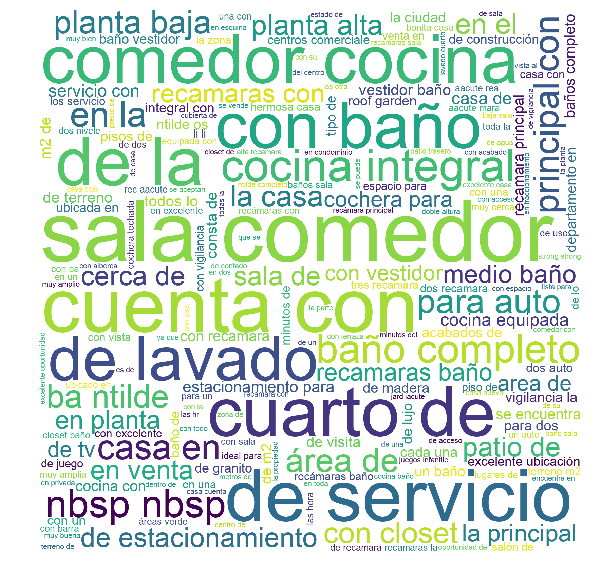

In [10]:
wordcloud = WordCloud(width = 1600, height = 1600, 
                background_color ='white', 
                stopwords = stopwords,
                font_path='../data/arial.ttf',
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig('words.png')
plt.show() 

# Realizamos analisis de terminos para todas las provincias 

In [182]:
import pandas
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import DictVectorizer
from scipy.sparse import hstack
from sklearn.linear_model import Ridge
from util import get_errors

In [184]:
dfWords =df[['id','descripcion','provincia','precio']]
dfWords.head(3)

,id,descripcion,provincia,precio
0,254099,"depto. interior de 80.15m2, consta de sala com...",Distrito Federal,2273000.0
1,53461,"<p>entre sonora y guerrero, atr&aacute;s del h...",Distrito Federal,3600000.0
2,247984,descripcion \nla mejor ubicacion residencial e...,Jalisco,1200000.0


## Limpieza de datos

In [185]:
#Limpiamos los datos borrando NaN y los precios que no son de tipo numerico.
dfWords = dfWords.dropna()
ro = []
for index, row in dfWords.iterrows():
    try:
        t = float(row['precio'])
    except:
        ro.append(index)
        
dfWords=dfWords.drop(ro)

In [186]:
# Separamos en Train/Test
limit = int(0.85 * len(dfWords))
train = dfWords[0:limit]
test= dfWords[limit:]

In [187]:
test.head(3)

,id,descripcion,provincia,precio
204010,201241,<p>preciosos departamentos ubicados en sodzil ...,Yucatán,1050000.0
204011,216425,¡¡¡ estrene !!! condominio nuevo estilo minima...,Distrito Federal,3490000.0
204012,26156,-- rav01698n-108 -- deptos de primer nivel&...,Distrito Federal,4468119.0


## Preparamos el modelo 

In [188]:
#Nos quedamos con las columnas que queremos usar
test=test[['id','descripcion','provincia','precio']]
test1 = test[['id','descripcion','provincia']]
test1['precio']=0
test1['descripcion']=test1['descripcion'].str.lower()
test1['descripcion']=test1['descripcion'].replace('[^a-zA-Z0-9]', ' ', regex = True)
test1.head(3)

,id,descripcion,provincia,precio
204010,201241,p preciosos departamentos ubicados en sodzil ...,Yucatán,0
204011,216425,estrene condominio nuevo estilo minima...,Distrito Federal,0
204012,26156,rav01698n 108 deptos de primer nivel ...,Distrito Federal,0


In [189]:
train = train[['id','descripcion','provincia','precio']]
train.head(3)

,id,descripcion,provincia,precio
0,254099,"depto. interior de 80.15m2, consta de sala com...",Distrito Federal,2273000.0
1,53461,"<p>entre sonora y guerrero, atr&aacute;s del h...",Distrito Federal,3600000.0
2,247984,descripcion \nla mejor ubicacion residencial e...,Jalisco,1200000.0


In [190]:
# Limpiamos los datos, nos quedamos solo con los caracteres que nos interesan para que sea mas facil la separancion en palabras
train['descripcion']=train['descripcion'].str.lower()
train['descripcion'].replace('[^a-zA-Z0-9]', ' ', regex = True)

0         depto  interior de 80 15m2  consta de sala com...
1          p entre sonora y guerrero  atr aacute s del h...
2         descripcion  la mejor ubicacion residencial en...
3         casa en privada con caseta de vigilancia casas...
4         bonito departamento en excelentes condiciones ...
5         amplio departamento  estancia de sala y comedo...
6         ubicada en esquina  pertenece san lorenzo agen...
7         casa emilia en venta playa del carmenfracciona...
8          p pre venta de preciosos departamento ecologi...
9         terreno de 5 500m2 bardeado  uso de suelo h 20...
10                                               p mi 2 deg
11        departamento nuevo  256 m2 de construccion un ...
12         p  strong casa   strong en venta en fracciona...
13        flamante casa habitaci n en condominio horizon...
14        pre venta de residencia en la toscana con exce...
15         p casa en dos niveles  3 rec maras la princip...
17        magnifico departamento con exc

In [191]:
train.head(3)

,id,descripcion,provincia,precio
0,254099,"depto. interior de 80.15m2, consta de sala com...",Distrito Federal,2273000.0
1,53461,"<p>entre sonora y guerrero, atr&aacute;s del h...",Distrito Federal,3600000.0
2,247984,descripcion \nla mejor ubicacion residencial e...,Jalisco,1200000.0


## Armamos el modelo 

In [192]:
vectorizer = TfidfVectorizer(min_df=5)
X_tfidf = vectorizer.fit_transform(train['descripcion'])
train['provincia'].fillna('nan', inplace=True)
enc = DictVectorizer()
X_train_categ = enc.fit_transform(train[['provincia']].to_dict('records'))

# Take a sequence of arrays and stack them horizontally to make a single array. 
# Rebuild arrays divided by scipy.sparse.hstack. 
# Note that matrices are sparse. 
# In numerical analysis, a sparse matrix is a matrix in which most of the elements are zero. 
X = hstack([X_tfidf,X_train_categ])

In [193]:
# Classifier: 
clf = Ridge(alpha=1.0, random_state=241)

# The target value (algorithm has to predict) is SalaryNormalized
y = train['precio']

# train model on data
clf.fit(X, y) 

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=241, solver='auto', tol=0.001)

## Preparamos los datos de test para prediccion

In [194]:
test1['provincia'].fillna('nan', inplace=True)
test1['descripcion']=test1['descripcion'].str.lower()
test1['descripcion'].replace('[^a-zA-Z0-9]', ' ', regex = True)
X_testtidf = vectorizer.transform(test1['descripcion']) 
X_test_categ = enc.transform(test1[['provincia']].to_dict('records'))

# Take a sequence of arrays and stack them horizontally to make a single array. 
# Rebuild arrays divided by scipy.sparse.hstack. 
# Note that matrices are sparse. 
# In numerical analysis, a sparse matrix is a matrix in which most of the elements are zero. 

X_test = hstack([X_testtidf,X_test_categ])
X_test

<35704x23694 sparse matrix of type '<type 'numpy.float64'>'
	with 1626532 stored elements in COOrdinate format>

## Realizamos Prediccion 

In [195]:
rslt = clf.predict(X_test)

In [196]:
test['prediccion']=rslt

In [197]:
test.head(3)

,id,descripcion,provincia,precio,prediccion
204010,201241,<p>preciosos departamentos ubicados en sodzil ...,Yucatán,1050000.0,3.271097e+05
204011,216425,¡¡¡ estrene !!! condominio nuevo estilo minima...,Distrito Federal,3490000.0,5.118455e+06
204012,26156,-- rav01698n-108 -- deptos de primer nivel&...,Distrito Federal,4468119.0,4.409682e+06


## Obtengo RSME y RSMLE

In [209]:
dferr = test[test['prediccion']>-1]
dferr=dferr[dferr['prediccion'].notna()]
dferr['precio']=dferr['precio'].apply(lambda x : float(x))
dferr=dferr[dferr['precio']>-1]

In [208]:
dferr[dferr['precio']<-1]

,id,descripcion,provincia,precio,prediccion
216333,131483,<p>excelente oportunidad a solo 5 mins. de tel...,n. garaje para 2 autos y bodega. cuarto de ser...,-99.244559,1.144821e+05
232004,2431,<p>excelente residencia nuevecita ubicada en e...,&iexcl,-103.447824,2.547107e+06


In [210]:
rsme, rsmle = get_errors(dferr['precio'],dferr['prediccion'])

In [211]:
rsme

1463453.2471801217

In [212]:
rsmle

0.9941945466339057

# Analisis provincia a provincia 

In [89]:
dfgroups = dfWords[['id','provincia','descripcion','precio']]

In [90]:
provincias = dfgroups['provincia'].value_counts()[:32].keys()

In [91]:
dfgroups = dfgroups[dfgroups['provincia'].isin(provincias)]

In [93]:
provincias

Index([u'Distrito Federal', u'Edo. de México', u'Jalisco', u'Querétaro',
       u'Nuevo León', u'Puebla', u'San luis Potosí', u'Yucatán', u'Morelos',
       u'Veracruz', u'Quintana Roo', u'Chihuahua', u'Coahuila',
       u'Baja California Norte', u'Sonora', u'Guanajuato', u'Guerrero',
       u'Hidalgo', u'Michoacán', u'Tamaulipas', u'Durango', u'Sinaloa',
       u'Aguascalientes', u'Baja California Sur', u'Nayarit', u'Chiapas',
       u'Colima', u'Tabasco', u'Tlaxcala', u'Oaxaca', u'Campeche',
       u'Zacatecas'],
      dtype='object')

In [169]:
def getPrediction(dfWords,provincia='Distrito Federal'):
    df = dfWords[dfWords['provincia']==provincia]
    # Separamos en Train/Test
    limit = int(0.85 * len(df))
    train = df[0:limit]
    test= df[limit:]
    test['provincia'].fillna('nan', inplace=True)

    vectorizer = TfidfVectorizer(min_df=5)
    X_tfidf = vectorizer.fit_transform(train['descripcion'])
    train['provincia'].fillna('nan', inplace=True)
    enc = DictVectorizer()
    X_train_categ = enc.fit_transform(train[['provincia']].to_dict('records'))

    # Take a sequence of arrays and stack them horizontally to make a single array. 
    # Rebuild arrays divided by scipy.sparse.hstack. 
    # Note that matrices are sparse. 
    # In numerical analysis, a sparse matrix is a matrix in which most of the elements are zero. 
    X = hstack([X_tfidf,X_train_categ])
    # Classifier: 
    clf = Ridge(alpha=1.0, random_state=241)

    # The target value (algorithm has to predict) is SalaryNormalized
    y = train['precio']

    # train model on data
    clf.fit(X, y) 
    
    test=test[['id','descripcion','provincia','precio']]
    test1 = test[['id','descripcion','provincia']]
    test1['precio']=0
    test1['descripcion']=test1['descripcion'].str.lower()
    test1['descripcion']=test1['descripcion'].replace('[^a-zA-Z0-9]', ' ', regex = True)
    X_testtidf = vectorizer.transform(test1['descripcion']) 
    X_test_categ = enc.transform(test1[['provincia']].to_dict('records'))

    # Take a sequence of arrays and stack them horizontally to make a single array. 
    # Rebuild arrays divided by scipy.sparse.hstack. 
    # Note that matrices are sparse. 
    # In numerical analysis, a sparse matrix is a matrix in which most of the elements are zero. 

    X_test = hstack([X_testtidf,X_test_categ])
    rslt = clf.predict(X_test)
    test['prediccion']=rslt
#     rmse=math.sqrt(mean_squared_error(test['precio'],test['prediccion']))
    testx = test[test['prediccion'].notna()]
    testx =testx[testx['prediccion']>-1]
    testx['precio']=testx['precio'].apply(lambda x:float(x))
    rsme, rsmle = get_errors(testx['precio'],testx['prediccion'])
    
    return rmse,rsmle

In [108]:
provincias

Index([u'Distrito Federal', u'Edo. de México', u'Jalisco', u'Querétaro',
       u'Nuevo León', u'Puebla', u'San luis Potosí', u'Yucatán', u'Morelos',
       u'Veracruz', u'Quintana Roo', u'Chihuahua', u'Coahuila',
       u'Baja California Norte', u'Sonora', u'Guanajuato', u'Guerrero',
       u'Hidalgo', u'Michoacán', u'Tamaulipas', u'Durango', u'Sinaloa',
       u'Aguascalientes', u'Baja California Sur', u'Nayarit', u'Chiapas',
       u'Colima', u'Tabasco', u'Tlaxcala', u'Oaxaca', u'Campeche',
       u'Zacatecas'],
      dtype='object')

In [171]:
rsme =dict()
for province in provincias:
    rsme[province]= getPrediction(dfWords,province)

In [176]:
dfERRORS = pd.DataFrame.from_dict(rsme)

In [179]:
dfERRORS.to_csv('errorsWords.csv')